In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [13]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

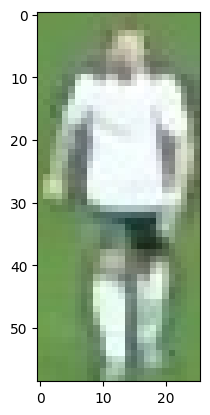

In [14]:
plt.imshow(image)
plt.show()


# Take the top half of the image

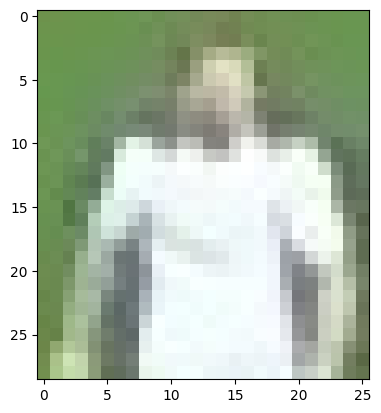

In [15]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image color into to clusters

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


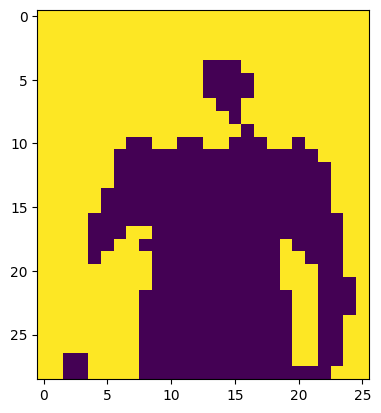

In [17]:
# Reshape the image into 2D array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 cluster
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image= labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [18]:
corner_clusters = [clustered_image[0,0],clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [19]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [20]:
kmeans.cluster_centers_[player_cluster]

array([230.03896104, 237.92532468, 234.30194805])